# To cite this code please use the following format: 

Yehudai, M., & Tweed, L. E. (2022). Bayesian sensitivity analysis of Nd 
isotopes ratios (Supp. code for Yehudai et al.).GitHub. https://doi.org/https://doi.org/10.5281/zenodo.7011252

In [1]:
import pandas as pd
import numpy as np
import os
import random as rand
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import math
from statistics import mode
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Mixing Model

$$
\varepsilon_{Nd}^{mix} = \frac{\varepsilon_{Nd}^{NA}C_{Nd}^{NA}F^{NA}+\varepsilon_{Nd}^PC_{Nd}^P(1-F^{NA})}{C_{Nd}^{NA}F^{NA}+C_{Nd}^P(1-F^{NA})} = \frac{\varepsilon_{Nd}^{NA}rNdF^{NA}+\varepsilon_{Nd}^P(1-F^{NA})}{rNdF^{NA}+(1-F^{NA})} 
$$

where
$$
rNd = \frac{C_{NA}}{C_P} 
$$

- Given well-constrained endmember isotopic concentrations ($\varepsilon_{Nd}^{NA}$ and $\varepsilon_{Nd}^P$), $\varepsilon_{Nd}^{mix}$ depends on $F^{NA}$ and the concentration ratio $rNd$. 
- $rNd$ is typically assumed to be the same as observed in modern oceans, however there is uncertainty in what its value was in the past. It therefore represents a significant source of uncertainty in reconstructions of $F^{NA}$ using Nd isotopes.  

In [2]:
# Plot settings
mpl.rc('axes', linewidth=1., labelpad=6, labelsize=18)
mpl.rc('xtick', labelsize=16, direction='in')
mpl.rc('xtick.major', size=6, width=1, pad=5)
mpl.rc('ytick', labelsize=16, direction='in')
mpl.rc('ytick.major', size=6, width=1, pad=5)
mpl.rc('lines', linewidth=2.5, markersize=12)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

# The sensitivity of $\varepsilon{Nd_{mix}}$ to $r{Nd}$ and $F_{NA}$

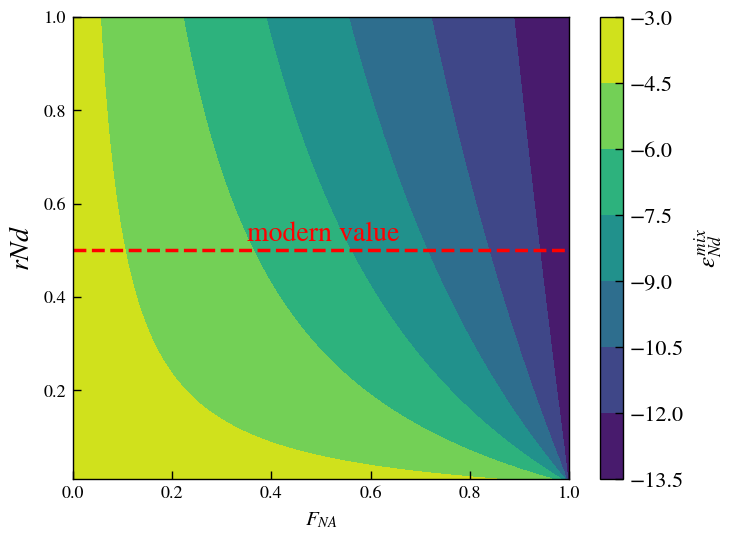

In [3]:
# Contour plot of eNd
eNd_NA = -13
eNd_P = -4
F_NA = np.linspace(0,1,100)
r = np.linspace(0.01,1,100)
F_NA,r = np.meshgrid(F_NA,r)
eNd_mix = np.empty((100,100))
for i in range(100):
    for j in range(100):
        eNd_mix[i,j] = (eNd_NA*r[i,j]*F_NA[i,j] + eNd_P*(1-F_NA[i,j]))/(r[i,j]*F_NA[i,j]+(1-F_NA[i,j]))
        
plt.figure(figsize=(8,6))
plt.dpi=600
font = FontProperties()
font.set_family('sans-serif')
plt.contourf(F_NA,r,eNd_mix)
plt.axhline(0.5,color='r',linestyle='--')
plt.text(0.35,0.52,'modern value',fontsize=20,color='r')
plt.colorbar(label='$\epsilon_{Nd}^{mix}$')
plt.xlabel('$F_{NA}$',fontsize=15)
plt.ylabel('$rNd$',fontsize=20)
#plt.yscale("log")
plt.rcParams["font.family"] = "Sans-serif"
plt.tick_params(axis='both',labelsize=13)
plt.show()


# Bayesian Analysis

## Variables range definition 


In [38]:
N = 100
eNd_NA=np.linspace(-11,-14,N) # define an array for epsilon Nd of the deep North Atlantic end-member (constant) from Fe-Mn crusts
eNd_P=np.linspace(-3,-5,N) # define an array for epsilon Nd of the deep Pacific end-member (constant)
F_NA=np.linspace(0,1,N)  # define an array for fraction of NA end-member for a given location (constant)
C_NA=np.linspace(11,44,N) # define an array for a range of Nd concentrations for the NA and scale
C_P=np.linspace(21,84,N)  # define an array for a range of Nd concentrations for the P and scale
r = np.linspace(0.01,1,N) # alternatively use uniform prior distribution for rNd


## (a) Monte Carlo loop

In [39]:
# Initialise and save values for the eNd-mix output
loop_run=1000000 #The number of loops I want to run
eNd_mix_i=np.ones(loop_run)*np.nan # build a skeleton for the eNd_mix values
F_NA_final=np.ones(loop_run)*np.nan # build a skeleton for the F_NA_final values, where F_NA_final is the F_NA at the end of each run
r_final =np.ones(loop_run)*np.nan # build a skeleton for the r_final values, where r_final is the rNd at the end of each run

# Monte Carlo loop

for i in range(0,loop_run): #number of loop runs
    ind=rand.randint(0,N-1) # choose a random index number in the range defined above for eNd_NA
    eNd_NA_i=eNd_NA[ind]   # Define eNd_NA for run i as the number chosen in the line above
    ind=rand.randint(0,N-1) # choose a random index number in the range defined above for F_NA
    F_NA_i=F_NA[ind]       # Define F_NA for run i as the number chosen in the line above
    ind=rand.randint(0,N-1) # choose a random index number in the range defined above for eNd_P
    eNd_P_i=eNd_P[ind]     # Define F_NA for run i as the number chosen in the line above
    ind=rand.randint(0,N-1) # choose a random index number in the range defined above for rNd
    r_i=r[ind]         # Define rNd for run i as the number chosen in the line above
    F_P=1-F_NA_i
    eNd_mix_i[i]=((eNd_NA_i*r_i*F_NA_i)+(eNd_P_i*F_P))/((r_i*F_NA_i)+F_P) #Equation to calculate eNd_mix
    F_NA_final[i]=F_NA_i
    r_final[i]=r_i

# Constrain results for F_NA and rNd values for the NA and SA suring G and IG according to observed eNd_mix data

# IG variability of F_NA in the SA according to the obsereved values for IG (eNd beween -9 and -10)
F_NA_SA_IG=F_NA_final[np.where((eNd_mix_i<-9) & (eNd_mix_i>-10))] 

# G variability of F_NA in the SA according to the obsereved values for G (eNd beween -7 and -8.5)
F_NA_SA_G=F_NA_final[np.where((eNd_mix_i<-7) & (eNd_mix_i>-8.5))] 

# IG variability of F_NA in the NA
F_NA_NA_IG=F_NA_final[np.where((eNd_mix_i<-12)&(eNd_mix_i>-14.5))] 

# G variability of F_NA in the NA
F_NA_NA_G=F_NA_final[np.where((eNd_mix_i<-11)&(eNd_mix_i>-13))] 
 
# IG variability of C_ratio in the NA
r_NA_IG=(r_final)[np.where((eNd_mix_i<-12)&(eNd_mix_i>-14.5))] 

# G variability of C_ratio in the NA
r_NA_G=(r_final)[np.where((eNd_mix_i<-11)&(eNd_mix_i>-13))] 

# IG variability of C_ratio in the SA
r_SA_IG=(r_final)[np.where((eNd_mix_i<-9) & (eNd_mix_i>-10))] 

# G variability of C_ratio in the SA
r_SA_G=(r_final)[np.where((eNd_mix_i<-7) & (eNd_mix_i>-8.5))] 


## (b) Plotting Prior distributions

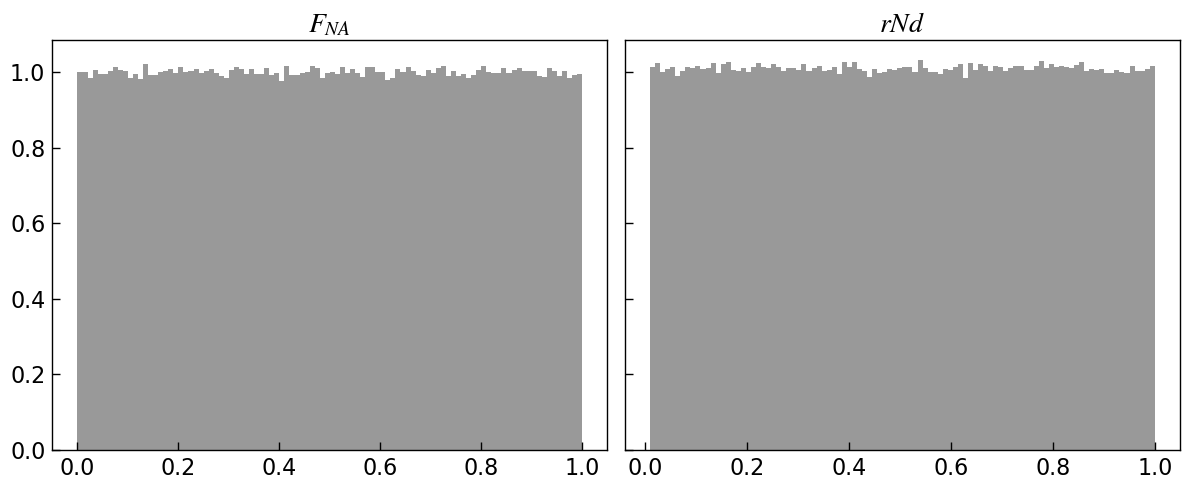

In [40]:
fig,ax = plt.subplots(1,2,figsize=(12,5),sharey=True,tight_layout=True)
nbins = 100 #nbins=number of bins in histogram
ax[0].hist(F_NA_final,nbins,density=True,color='k',alpha=0.4) # x=number of counts for each bin. 
ax[0].set_title('$F_{NA}$',fontsize=20)
ax[1].hist(r_final,nbins,density=True,color='k',alpha=0.4) # x=number of counts for each bin. 
ax[1].set_title('$rNd$',fontsize=20)
plt.rcParams["font.family"] = "Sans-serif"
plt.show()

## (c) Plotting $F_{NA}$  in the NA and SA during IG and G and calculating the statistical properties for each result 

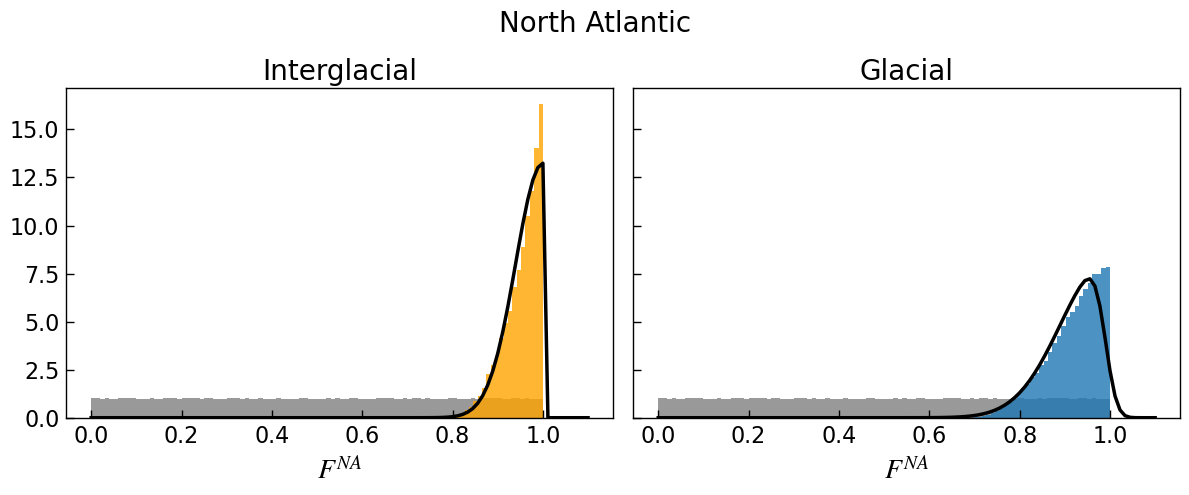

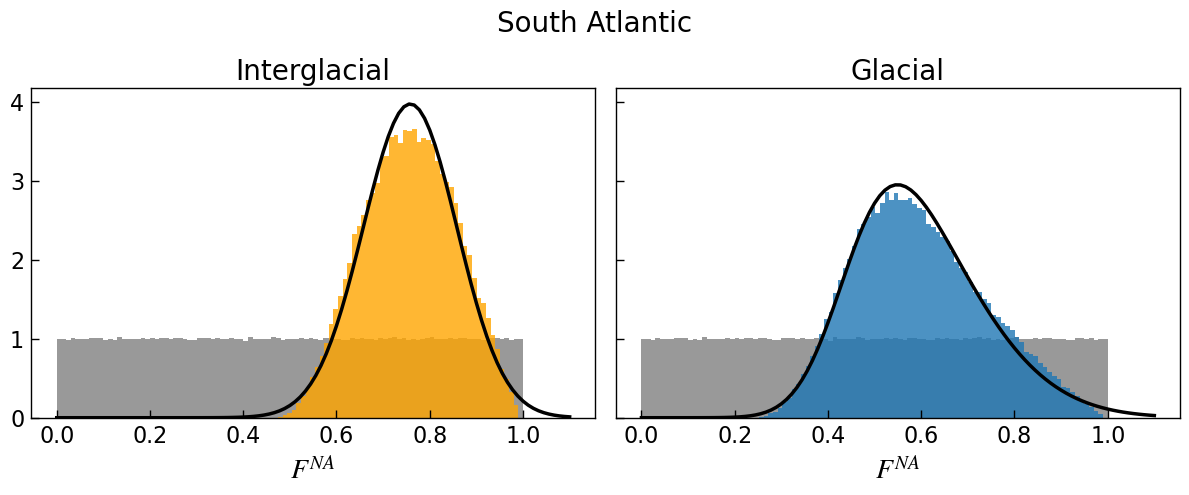

In [41]:
# Histograms are plotted with prior distribution in background for comparison

fig,ax_NA = plt.subplots(1,2,figsize=(12,5),sharey=True,tight_layout=True)
nbins = int(math.ceil(max(100*F_NA_NA_IG)-min(100*F_NA_NA_IG)))
ax_NA[0].hist(F_NA_final,100,density=True,color='k',alpha=0.4)
ax_NA[0].hist(F_NA_NA_IG,nbins,density=True,color='orange',alpha=0.8) # x=number of counts for each bin. 
ax_NA[0].set_title('Interglacial',fontsize=20)
nbins = int(math.ceil(max(100*F_NA_NA_G)-min(100*F_NA_NA_G)))
ax_NA[1].hist(F_NA_final,100,density=True,color='k',alpha=0.4)
ax_NA[1].hist(F_NA_NA_G,nbins,density=True,alpha=0.8) # x=number of counts for each bin. 
ax_NA[1].set_title('Glacial',fontsize=20)
ax_NA[0].set_xlabel('$F^{NA}$',fontsize=20)
ax_NA[1].set_xlabel('$F^{NA}$',fontsize=20)
fig.suptitle('North Atlantic', fontsize=20)
plt.rcParams["font.family"] = "Sans-serif"

fig,ax_SA = plt.subplots(1,2,figsize=(12,5),sharey=True,tight_layout=True)
nbins = int(math.ceil(max(100*F_NA_SA_IG)-min(100*F_NA_SA_IG)))
ax_SA[0].hist(F_NA_final,100,density=True,color='k',alpha=0.4)
ax_SA[0].hist(F_NA_SA_IG,nbins,density=True,color='orange',alpha=0.8) # x=number of counts for each bin. 
ax_SA[0].set_title('Interglacial',fontsize=20)
nbins = int(math.ceil(max(100*F_NA_SA_G)-min(100*F_NA_SA_G)))
ax_SA[1].hist(F_NA_final,100,density=True,color='k',alpha=0.4)
ax_SA[1].hist(F_NA_SA_G,nbins,density=True,alpha=0.8) # x=number of counts for each bin. 
ax_SA[1].set_title('Glacial',fontsize=20)
ax_SA[0].set_xlabel('$F^{NA}$',fontsize=20)
ax_SA[1].set_xlabel('$F^{NA}$',fontsize=20)
fig.suptitle('South Atlantic', fontsize=20)
plt.rcParams["font.family"] = "Sans-serif"

# skewnormal fits
x = np.linspace(0.,1.1,100)
s, loc, scale = stats.skewnorm.fit(F_NA_NA_IG)
p = stats.skewnorm.pdf(x, s, loc, scale)
ax_NA[0].plot(x,p,'k-')
s, loc, scale = stats.skewnorm.fit(F_NA_NA_G)
p = stats.skewnorm.pdf(x, -5, 0.99, scale)
ax_NA[1].plot(x,p,'k-')
s, loc, scale = stats.skewnorm.fit(F_NA_SA_IG)
p = stats.skewnorm.pdf(x, s, loc, scale)
ax_SA[0].plot(x,p,'k-')
s, loc, scale = stats.skewnorm.fit(F_NA_SA_G)
p = stats.skewnorm.pdf(x, s, loc, scale)
ax_SA[1].plot(x,p,'k-')

plt.show()

## (d) Plotting $rNd$ in the NA and SA during G and IG

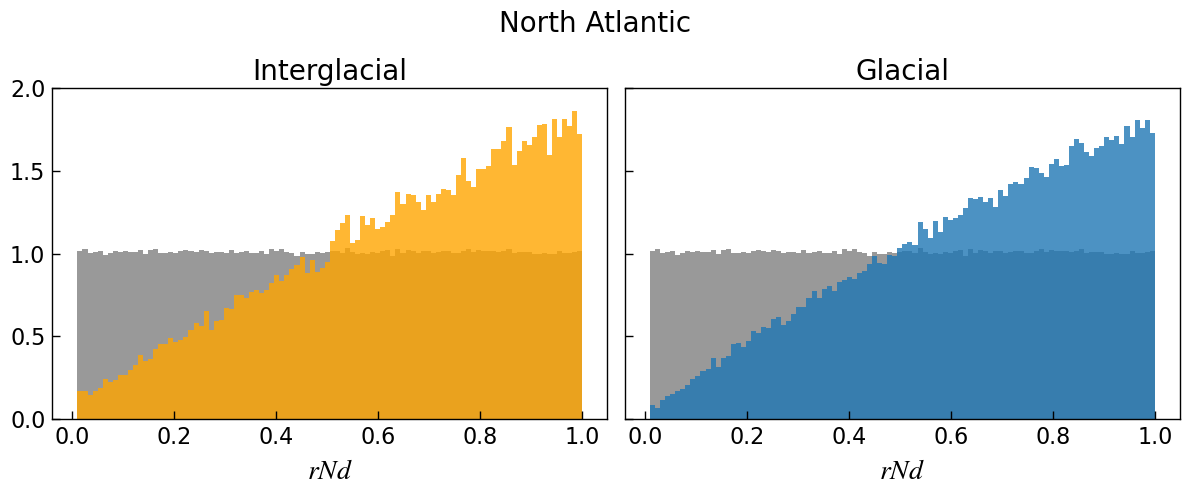

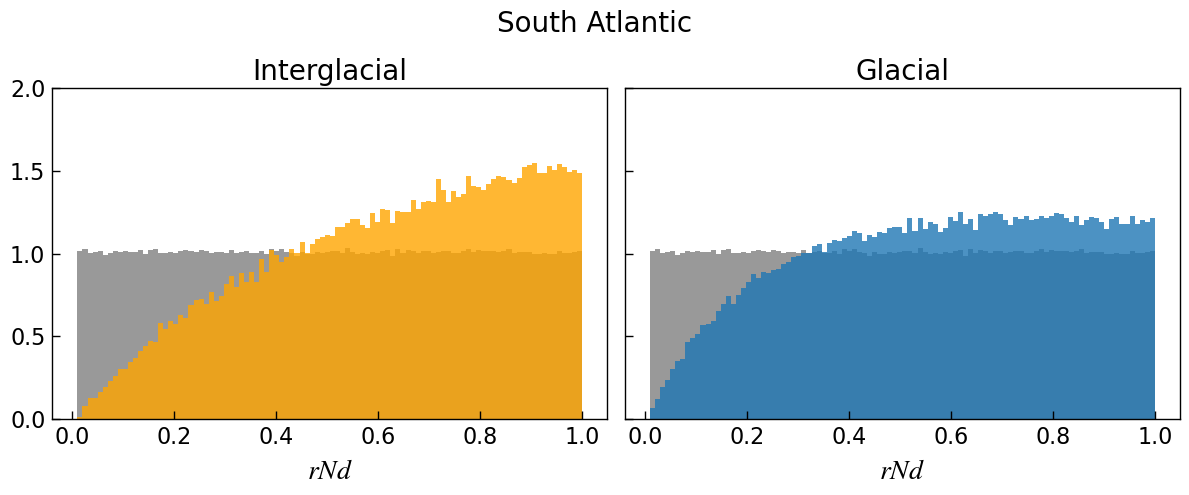

In [42]:
fig,ax = plt.subplots(1,2,figsize=(12,5),sharey=True,tight_layout=True)
nbins = 100
ax[0].hist(r_final,100,density=True,color='k',alpha=0.4)
ax[0].hist(r_NA_IG,nbins,density=True,color='orange',alpha=0.8) # x=number of counts for each bin. 
ax[0].set_title('Interglacial',fontsize=20) 
ax[1].hist(r_final,100,density=True,color='k',alpha=0.4)
ax[1].hist(r_NA_G,nbins,density=True,alpha=0.8) # x=number of counts for each bin. 
ax[1].set_title('Glacial',fontsize=20) 
ax[0].set_xlabel('$rNd$',fontsize=20)
ax[1].set_xlabel('$rNd$',fontsize=20)
ax[0].set_ylim(0,2)
ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
fig.suptitle('North Atlantic', fontsize=20)
plt.rcParams["font.family"] = "Sans-serif"

fig,ax = plt.subplots(1,2,figsize=(12,5),sharey=True,tight_layout=True)
nbins = 100
ax[0].hist(r_final,100,density=True,color='k',alpha=0.4)
ax[0].hist(r_SA_IG,nbins,density=True,color='orange',alpha=0.8) # x=number of counts for each bin. 
ax[0].set_title('Interglacial',fontsize=20) 
ax[1].hist(r_final,100,density=True,color='k',alpha=0.4)
ax[1].hist(r_SA_G,nbins,density=True,alpha=0.8) # x=number of counts for each bin. 
ax[1].set_title('Glacial',fontsize=20) 
ax[0].set_xlabel('$rNd$',fontsize=20)
ax[1].set_xlabel('$rNd$',fontsize=20)
ax[0].set_ylim(0,2)
ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
fig.suptitle('South Atlantic', fontsize=20)
#plt.rcParams["font.family"] = "Sans-serif"

plt.show()

**Posterior distributions completely overlap with prior distribution indicating that any value is $r$ is possible. This means that observed $\varepsilon_{Nd}$ cannot help us determine $rNd$.** 

# Error propagtion

In [ ]:
# Loading data
df_1090 = pd.read_csv('C:\\Users\\maaya\\Dropbox\\School\\PhD\\Columbia\\Research\\MPT_Project\\AMOC_Nd_Articles\\eNd_sensitivity_test\\eNd_transect_data_MPT\\Nd_isotopes_1090.csv')
df_926 = pd.read_csv('C:\\Users\\maaya\\Dropbox\\School\\PhD\\Columbia\\Research\\MPT_Project\\AMOC_Nd_Articles\\eNd_sensitivity_test\\eNd_transect_data_MPT\\Nd_isotopes_926.csv')
#df_926

In [ ]:
age_1090 = df_1090['Age [ka]']
eNd_obs_1090 = df_1090['Nd_isotopes_1090']
M_1090 = len(eNd_obs_1090)
age_926 = df_926['Age [ka]']
eNd_obs_926 = df_926['Nd_isotopes_926']
M_926 = len(eNd_obs_926)

In [ ]:
# Priors
N = 100
eNd_NA=np.linspace(-12.3,-15,N)
eNd_P=np.linspace(-3,-5,N)
r = np.linspace(0.2,1.,N) 


## Error propagation for site 1090

In [ ]:
# Initialise and save values for the eNd-mix output
loop_run=1000 #The number of loops I want to run
F_NA_final_1090=np.ones((M_1090,loop_run))*np.nan # build a skeleton for the F_NA_final values, where F_NA_final is the F_NA at the end of each run

# Monte Carlo loop
for j in range(0,M_1090):
    for i in range(0,loop_run): #number of loop runs
        condition = True
        while condition:
            ind=rand.randint(0,N-1) # choose a random index number in the range defined above for eNd_NA            
            eNd_NA_i=eNd_NA[ind]
            if eNd_obs_1090[j]<eNd_NA_i:
                condition = True
            else:
                condition = False
        ind=rand.randint(0,N-1) # choose a random index number in the range defined above for eNd_P
        eNd_P_i=eNd_P[ind]     # Define F_NA for run i as the number chosen in the line above
        ind=rand.randint(0,N-1) # choose a random index number in the range defined above for r
        r_i=r[ind]         # Define r for run i as the number chosen in the line above
        F_NA_final_1090[j,i] = (eNd_obs_1090[j]-eNd_P_i)/(r_i*(eNd_NA_i-eNd_obs_1090[j]) + eNd_obs_1090[j]-eNd_P_i)
        mean_1090 = np.mean(F_NA_final_1090, axis=1) # compute the mean of each simulation
        stds_1090 = np.std(F_NA_final_1090,axis=1)
        #mean= np.mean(F_NA_final, axis=0)
        #std = np.std(F_NA_final)
#     F_NA_final[j,]=F_NA_final[
#     F_NA_SA_IG=F_NA_final[np.where((eNd_mix_i<-9) & (eNd_mix_i>-10))] 
mean_1090
#stds


In [ ]:
## Error propagation for site 926

# Initialise and save values for the eNd-mix output
loop_run=1000 #The number of loops I want to run
F_NA_final_926=np.ones((M_926,loop_run))*np.nan # build a skeleton for the F_NA_final values, where F_NA_final is the F_NA at the end of each run

# Monte Carlo loop
for j in range(0,M_926):
    for i in range(0,loop_run): #number of loop runs
        condition = True
        while condition:
            ind=rand.randint(0,N-1) # choose a random index number in the range defined above for eNd_NA            
            eNd_NA_i=eNd_NA[ind]
            if eNd_obs_926[j]<eNd_NA_i:
                condition = True
            else:
                condition = False
        ind=rand.randint(0,N-1) # choose a random index number in the range defined above for eNd_P
        eNd_P_i=eNd_P[ind]     # Define F_NA for run i as the number chosen in the line above
        ind=rand.randint(0,N-1) # choose a random index number in the range defined above for r
        r_i=r[ind]         # Define r for run i as the number chosen in the line above
        F_NA_final_926[j,i] = (eNd_obs_926[j]-eNd_P_i)/(r_i*(eNd_NA_i-eNd_obs_926[j]) + eNd_obs_926[j]-eNd_P_i)
        mean_926 = np.mean(F_NA_final_926, axis=1) # compute the mean of each simulation
        stds_926 = np.std(F_NA_final_926,axis=1)
        #mean= np.mean(F_NA_final, axis=0)
        #std = np.std(F_NA_final)
#     F_NA_final[j,]=F_NA_final[
#     F_NA_SA_IG=F_NA_final[np.where((eNd_mix_i<-9) & (eNd_mix_i>-10))] 
mean_926
np.shape(F_NA_final_926)
#stds

# Plotting
plt.figure(figsize=(10,6))
plt.dpi=600

#1090 F_NA
for i in range(0,loop_run):
    plt.plot(age_1090,F_NA_final_1090[:,i],'#DD7F39',linewidth=0.1, alpha=0.5)
    
plt.fill_between(age_1090, mean_1090-stds_1090, mean_1090+stds_1090, color='#FFD166',zorder=3, alpha=0.5)
plt.plot(age_1090,mean_1090, color='#BA2D0B', zorder=3)

#926 F_NA
for i in range(0,loop_run):
    plt.plot(age_926,F_NA_final_926[:,i],'#5AA9E6',linewidth=0.1, alpha=0.5)
    
plt.fill_between(age_926, mean_926-stds_926, mean_926+stds_926, color='#3073A2',zorder=3, alpha=0.5)
plt.plot(age_926,mean_926, color='#0F4A75',zorder=3)

plt.xlim([min(age_1090),max(age_1090)])
plt.ylim([0,1])
plt.xlabel('Age [ka]',fontsize=20, fontname="calibri",style='normal')
plt.ylabel('$F_{NA}$',fontsize=20, fontname="calibri",style='normal')
plt.tick_params(axis='both',labelsize=15)
plt.show()

from matplotlib.patches import Ellipse, Polygon
plt.figure(figsize = (10,6))
plt.dpi=600
plt.plot(age_1090, eNd_obs_1090, '#BA2D0B')
plt.plot(age_926, eNd_obs_926, '#0F4A75')
plt.fill_between(age_1090,-15*np.ones(M_1090),y2=-11*np.ones(M_1090),color='#89608E',alpha=0.5)
plt.fill_between(age_1090,-5*np.ones(M_1090),y2=-3*np.ones(M_1090),color='#FFD166',alpha=0.5)
plt.xlim([min(age_1090),max(age_1090)])
plt.ylim([-2,-16])
plt.xlabel('Age [ka]',fontsize=24,fontname="calibri")
plt.ylabel('$\epsilon_{Nd}$',fontsize=24,fontname="calibri")
plt.tick_params(axis='both',labelsize=15)
plt.show()